In [ ]:
# Install necessary libraries
!pip install feedparser
!pip install pandas
!pip install transformers
!pip install flair
!pip install spacy
!python -m spacy download en_core_web_sm


In [ ]:
# Import libraries
import feedparser
import pandas as pd
from transformers import pipeline
from flair.models import SequenceTagger
from flair.data import Sentence
import spacy

In [ ]:
# Function to perform web scraping from an RSS feed
def web_scraping(url):
    feed = feedparser.parse(url)           # Parsing the RSS feed using feedparser library
    data = {'Date': [], 'Headline': []}    # Initializing an empty dictionary to store extracted data

    if 'entries' in feed:                  # Checking if the 'entries' key exists in the feed (indicating successful retrieval)
        for entry in feed.entries:
            date = entry.published          # Extracting date and headline from each entry
            headline = entry.title
            data['Date'].append(date)
            data['Headline'].append(headline)
    else:
        print("Failed to retrieve the RSS feed.")

    df = pd.DataFrame(data)
    return df

In [ ]:
# Function for sentiment analysis
def perform_sentiment_analysis(df):
    sentiment_pipeline = pipeline("sentiment-analysis")  # Initializing a sentiment analysis pipeline using transformers library
    df['Sentiment Score'] = df['Headline'].apply(lambda x: sentiment_pipeline(x)[0]['score'])  # Applying sentiment analysis to each headline in the DataFrame and add sentiment score to a new column
    return df

In [ ]:
# Function for named entity recognition (NER) for organization names
def perform_ner(df):
    ner_model = SequenceTagger.load('ner-ontonotes')   # Loading the pre-trained NER model for organization names
    df['Organization Names'] = df['Headline'].apply(lambda x: [entity.text for entity in Sentence(x).get_spans('org')]) # Applying NER to each headline in the DataFrame and extract organization names
    return df

In [ ]:
# Function for NER using spaCy
def perform_spacy_ner(df):
    nlp = spacy.load('en_core_web_sm') # Loading the spaCy English model
    df['Organization Names'] = df['Headline'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ == 'ORG'])  # Applying spaCy NER to each headline in the DataFrame and extract organization names
    return df

In [ ]:
# Define RSS feed URL
rss_url = "https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en"

In [ ]:
# Perform web scraping
df_web_scraping = web_scraping(rss_url)

In [ ]:
# Perform sentiment analysis
df_sentiment_analysis = perform_sentiment_analysis(df_web_scraping)

In [ ]:
# Perform NER using Flair
df_ner_flair = perform_ner(df_sentiment_analysis)

In [ ]:
# Perform NER using spaCy
df_ner_spacy = perform_spacy_ner(df_sentiment_analysis)

**csv table containing news Date, headline and source**

In [ ]:

# Display the final DataFrame after all processing
df_ner_spacy.head(101)

,Date,Headline,Sentiment Score,Organization Names
0,"Tue, 30 Jan 2024 08:10:07 GMT",NTPC Green Energy inks MoU with Maharashtra Go...,0.758634,"[NTPC Green Energy, Maharashtra Govt]"
1,"Wed, 31 Jan 2024 12:22:06 GMT",Hygenco to invest $2.5 bn over 3 years to set ...,0.783476,[Green Hydrogen]
2,"Wed, 31 Jan 2024 19:31:44 GMT","Rooftop solar, green hydrogen, offshore wind, ...",0.960042,[Budget]
3,"Mon, 29 Jan 2024 12:26:00 GMT",Indian renewables giant proposes 2GW green hyd...,0.993458,[]
4,"Mon, 29 Jan 2024 01:43:42 GMT","ReNew proposes to invest Rs 26,400 crore for g...",0.733632,[]
...,...,...,...,...
94,"Fri, 12 Jan 2024 08:00:00 GMT",Gujarat-The Green Hydrogen Destination of Indi...,0.972710,"[The Green Hydrogen Destination of India, CMO]"
95,"Tue, 02 Jan 2024 08:00:00 GMT","Greenko, ACME, Reliance Among Winners of SECI'...",0.977329,"[SECI, Green Hydrogen Manufacturing Auction - ..."
96,"Thu, 25 Jan 2024 09:42:32 GMT",Union Minister R K Singh commits additional fu...,0.984087,[]
97,"Tue, 16 Jan 2024 08:00:00 GMT",Blog: Green Hydrogen - The Final Step Towards ...,0.973788,[]


In [ ]:
!pip install gspread google-auth-oauthlib google-auth-httplib2 pandas


**Graph which shows Week wise trend of average sentiment score for all the news in that
particular week**


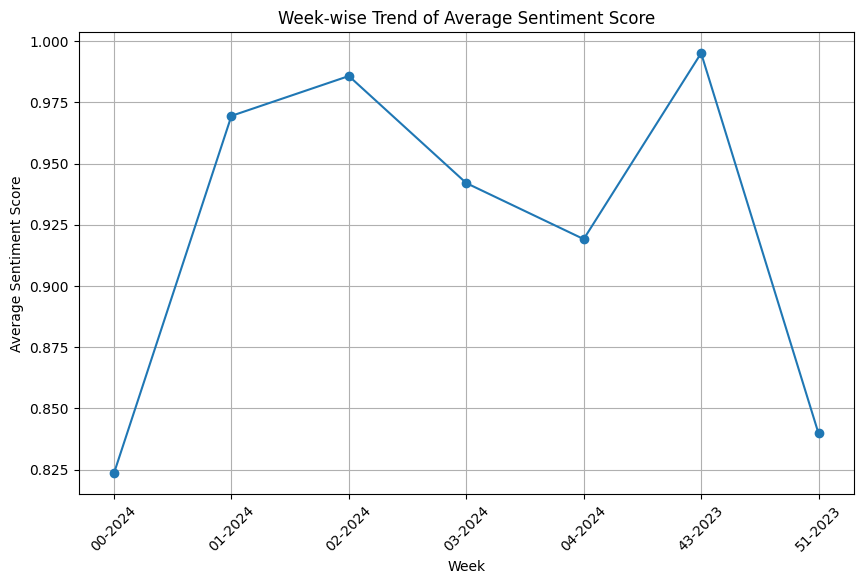

In [ ]:



# Convert 'Date' to datetime format
df_ner_spacy['Date'] = pd.to_datetime(df_ner_spacy['Date'])

# Extract week from the date
df_ner_spacy['Week'] = df_ner_spacy['Date'].dt.strftime('%U-%Y')

# Group by week and calculate the average sentiment score
weekly_average = df_ner_spacy.groupby('Week')['Sentiment Score'].mean().reset_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(weekly_average['Week'], weekly_average['Sentiment Score'], marker='o')
plt.title('Week-wise Trend of Average Sentiment Score')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


"After analyzing the week-wise trend of average sentiment scores, we observed fluctuations without any specific events driving them. While Week 43-2023 showed a higher average sentiment, Week 51-2023 experienced a dip. These variations suggest that sentiment is influenced by various factors, and although we couldn't pinpoint a single event, the overall trend provides insights into the dynamic nature of news sentiment throughout the analyzed period."







In [ ]:
pip install wordcloud


In [ ]:
df_ner_spacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Date                99 non-null     datetime64[ns, UTC]
 1   Headline            99 non-null     object             
 2   Sentiment Score     99 non-null     float64            
 3   Organization Names  99 non-null     object             
 4   Week                99 non-null     object             
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 4.0+ KB


In [ ]:
df_ner_spacy.isnull().sum()

Date                  0
Headline              0
Sentiment Score       0
Organization Names    0
Week                  0
dtype: int64

**Word cloud map with organization name identified in the News headline**

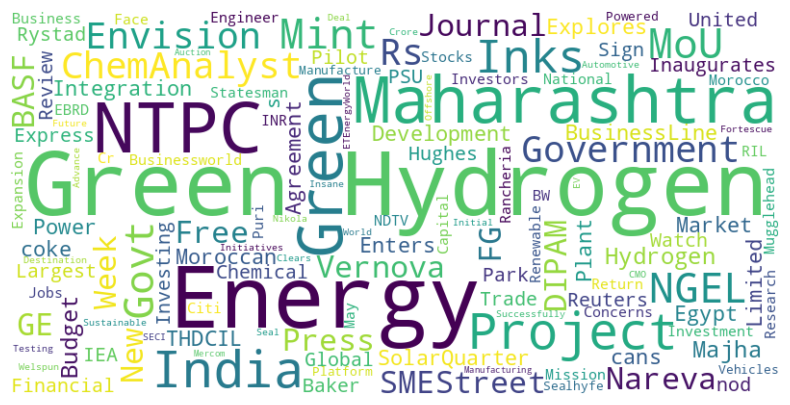

In [ ]:
from wordcloud import WordCloud



# Flatten the list of lists
organization_names_flat = [item for sublist in df_ner_spacy['Organization Names'].dropna() for item in sublist]

# Join the flattened list into a single string
organization_names = ' '.join(organization_names_flat)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(organization_names)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
